In [1]:
from titrato.sampl import TypeIPrediction
from titrato.reports import plot_micropka_network, tabulate_cycles, plot_free_energy_vs_ph, make_table_free_energy, plot_population_vs_ph
from IPython.display import Markdown
import matplotlib.pyplot as plt


# Free energy analysis demonstration

This notebook demonstrates how to use the `titrato` library for analyzing pKa values and microscopic free energies.

## Loading data
Load a csv file containing the data using the `TypeIPrediction` class, which is intended for analyzing microscopic pKa values, one molecule at a time.


In [2]:
# Specify the molecule name, and the data file location
curve = TypeIPrediction.from_id("SM14", "./raw_files/wuuvc-976-typeI-ECRISM-4.csv")


## Cycle analysis

Obtain all cycles of specified length, and display as a markdown table.
Warning, the algorithm used is not well optimized for the molecules with larger networks.


In [3]:
# Obtain all cycles of lenght 4 
Markdown(tabulate_cycles(curve, length=4))

cycle | sum pKa 
 -----|----- 
  ['SM14_micro002', 'SM14_micro005', 'SM14_micro006', 'SM14_micro001'] | 0.000 
 ['SM14_micro002', 'SM14_micro001', 'SM14_micro006', 'SM14_micro005'] | -0.000 
 ['SM14_micro002', 'SM14_micro001', 'SM14_micro004', 'SM14_micro003'] | -0.000 
 ['SM14_micro002', 'SM14_micro003', 'SM14_micro004', 'SM14_micro001'] | 0.000 


Plotting the network is also possible.

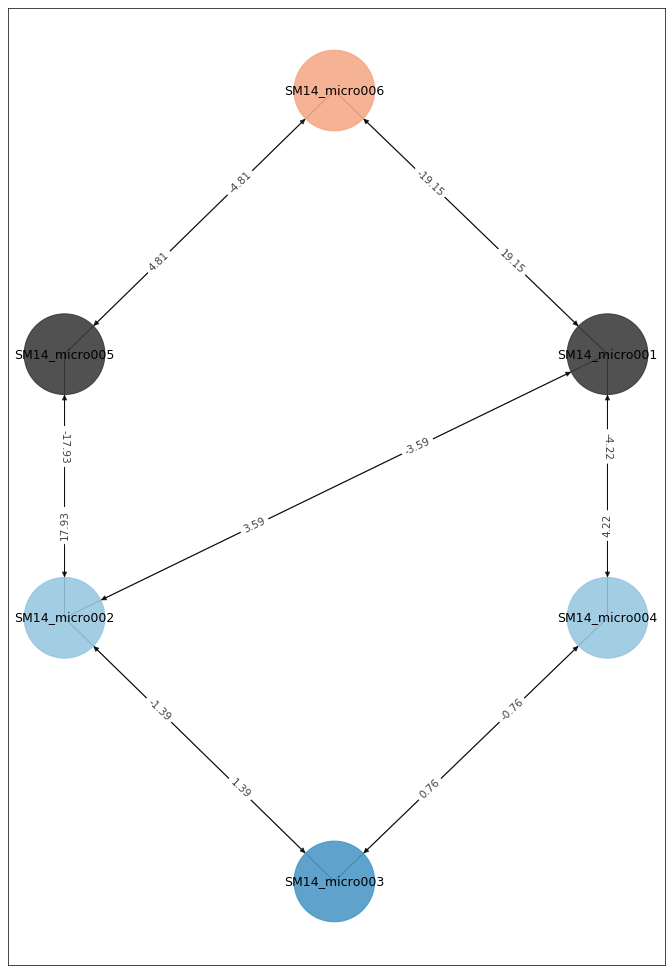

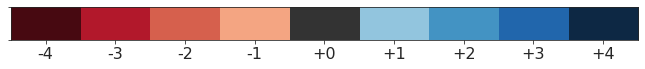

In [4]:
# Plot each state, with pKa values on the arrows.
# Color indicates the charge of each state, see colorbar.
fig1, ax1 = plot_micropka_network(curve)


## Analyzing the free energy of each state.


The free energy of each state can be derived using the pKa values provided.
This script uses the most deprotonated state as the pKa reference.
However, by convention the free energy value for the lowest energy neutral state is 0 at every pH. This produces titration curves with intuitive slopes that match the charge of each species.

In [5]:
Markdown(make_table_free_energy(curve, base_e=False,ph=0.0))

Microstate | Free energy (pKa units) at pH 0.0 | pKa references
 ---|---|---
SM14_micro006 | 19.15 | SM14_micro006
SM14_micro001 | 0.0 | SM14_micro006 -> SM14_micro001
SM14_micro002 | -3.5900000000000003 | SM14_micro006 -> SM14_micro005 -> SM14_micro002
SM14_micro004 | -4.219999999999997 | SM14_micro006 -> SM14_micro001 -> SM14_micro004
SM14_micro003 | -4.98 | SM14_micro006 -> SM14_micro005 -> SM14_micro002 -> SM14_micro003
SM14_micro005 | 14.340000000000002 | SM14_micro006 -> SM14_micro005


The free energy as a function of pH can be plotted. 

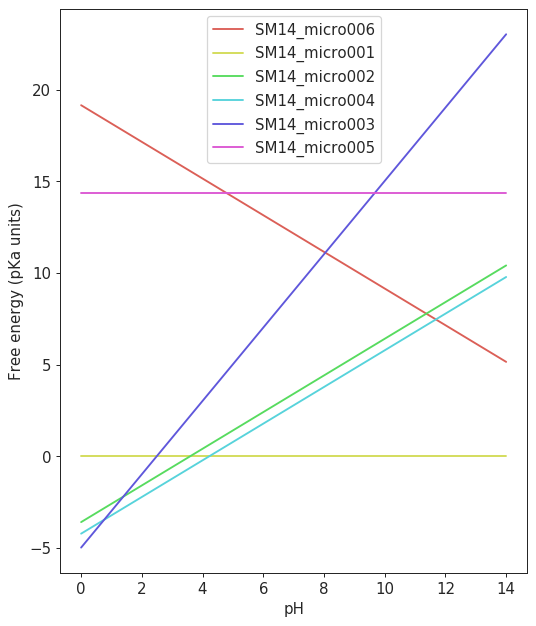

In [6]:
fig2, ax2 = plot_free_energy_vs_ph(curve,base_e=False, color_by_charge=False, mono_color=False)
leg2 = plt.legend(fontsize=12)

Populations can be derived from the free energy.

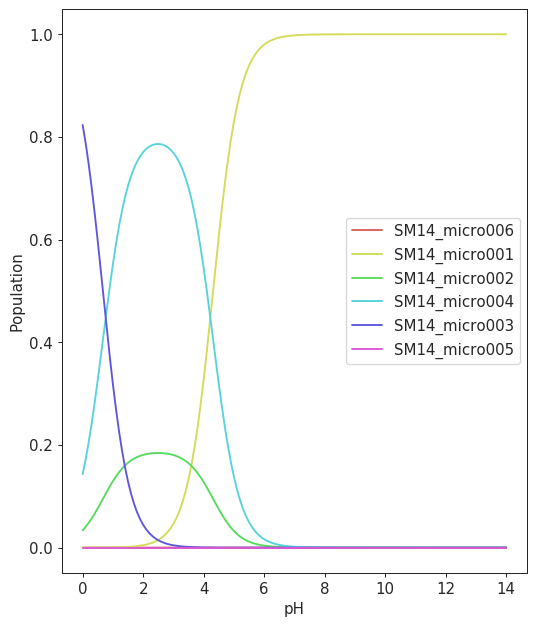

In [7]:
fig3, ax3 = plot_population_vs_ph(curve,mono_color=False)
leg3 = plt.legend(fontsize=12)

Some prefer these plotted in log units.

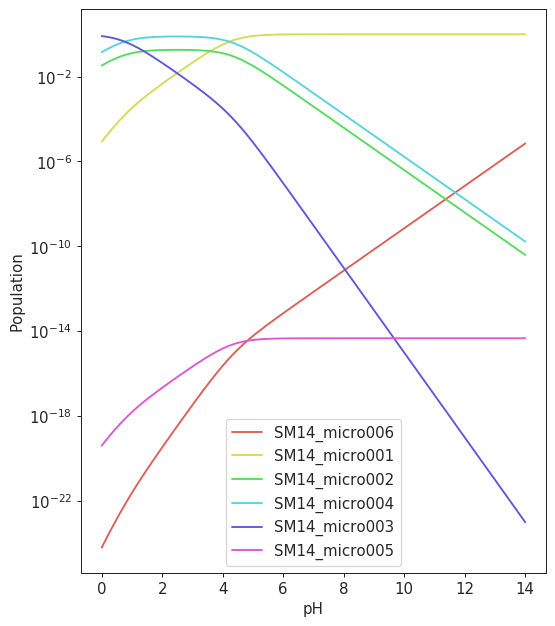

In [8]:
fig4, ax4 = plot_population_vs_ph(curve,mono_color=False)
plt.yscale("log")
leg4 = plt.legend(fontsize=12)